In [25]:
#import dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Read in csv
loan_data = pd.read_csv("/Users/jessmroczek/Documents/DA_Bootcamp/Homework%20Files/HW_Repositories/loan_approval_project_4/loan_approval_data.csv")

In [26]:
#Review the data
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [27]:
loan_data.shape

(367, 12)

In [29]:
# Dropping Loan_ID column 
#As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.
loan_data.drop(['Loan_ID'],axis=1,inplace=True)

In [30]:
loan_data.shape

(367, 11)

In [31]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [ ]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [43]:
# Create a new column called 'combined_income' by adding 'ApplicantIncome' and 'CoapplicantIncome'
loan_data['combined_income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']

# Check the first few rows to verify
print(loan_data[['ApplicantIncome', 'CoapplicantIncome', 'combined_income']].head())


   ApplicantIncome  CoapplicantIncome  combined_income
0             5720                  0             5720
1             3076               1500             4576
2             5000               1800             6800
3             2340               2546             4886
4             3276                  0             3276


In [44]:
#Check cols
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,combined_income
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4886
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276


In [46]:
loan_data['Coapplicant'] = loan_data['CoapplicantIncome'] != 0

#Check cols
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,combined_income,Coapplicant
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,False
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,True
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,True
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4886,True
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,False


In [49]:
# Create a new column 'income_loan_ratio' to hold the ratio of 'combined_income' over 'LoanAmount'
loan_data['income_loan_ratio'] = loan_data['combined_income'] / loan_data['LoanAmount']

# Check the first few rows to verify
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,combined_income,Coapplicant,income_loan_ratio
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,False,52.000000
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,True,36.317460
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,True,32.692308
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4886,True,48.860000
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,False,42.000000


In [ ]:
# Plot your data to see what's in your DataFrame
loan_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

/var/folders/l0/skyzfp0s7_q556g14t7506580000gn/T/ipykernel_66866/751668418.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
/var/folders/l0/skyzfp0s7_q556g14t7506580000gn/T/ipykernel_66866/751668418.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
/var/folders/l0/skyzfp0s7_q556g14t7506580000gn/T/ipykernel_66866/751668418.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
/var/folders/l0/skyzfp0s7_q556g14t7506580000gn/T/ipykernel_66866/751668418.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
/var/folders/l0/skyzfp0s7_q556g14t7506580000gn/T/ipykernel_66866/751668418.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)


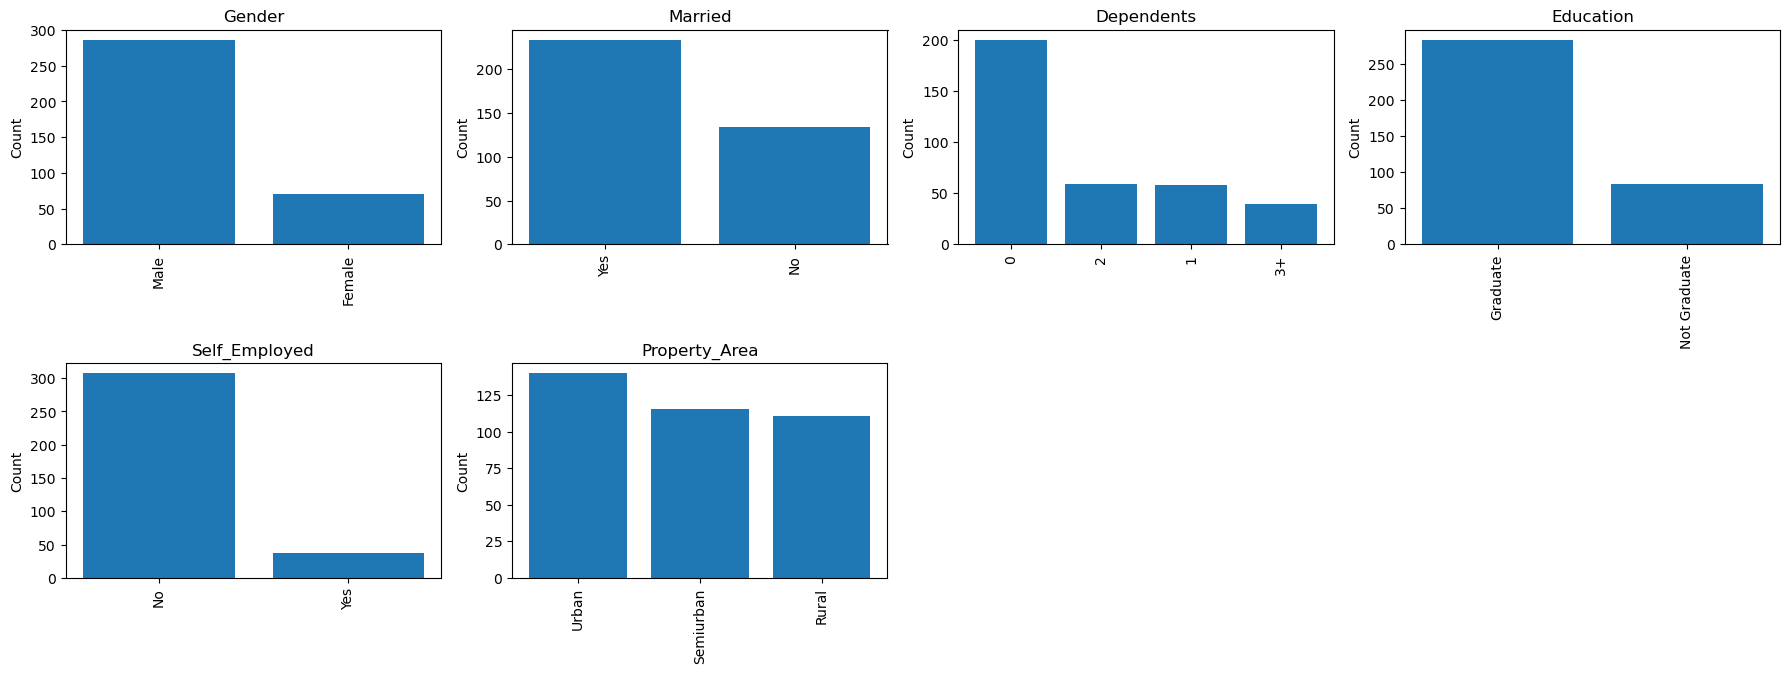

In [41]:
# Setting up the figure
fig = plt.figure(figsize=(18, 36))

# Loop through each column
index = 1
for col in object_cols:
    # Get the value counts
    y = loan_data[col].value_counts()
    
    # Create subplot
    ax = fig.add_subplot(11, 4, index)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(y.index, rotation=90)
    
    # Create bar plot using matplotlib
    ax.bar(y.index, y)
    
    # Increment index
    index += 1
    
    # Add label to the subplot
    ax.set_title(col)
    
    # Add y-axis label
    ax.set_ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot